In [1]:
import nilearn as nl
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle as pkl
import time
import os
import math
from nilearn import plotting
from nilearn import datasets
import time

In [2]:
data = pkl.load(open( "../data/shuffled_data_pcp.p", "rb" ))
trn_x = data['trn_x']
trn_y = data['trn_y']
val_x = data['val_x']
val_y = data['val_y']

num_label = trn_y.shape[1]
num_trn = trn_x.shape[0]
num_val = val_x.shape[0]
num_node = 48

print(num_label, num_trn, num_val)

2 696 175


INFO:tensorflow:Restoring parameters from ./model/model
prediction is 0 ( [9.991196e-01 8.679227e-04] )
label is 0 ( [1. 0.] )
Note: 1 means diseased and 0 means healthy


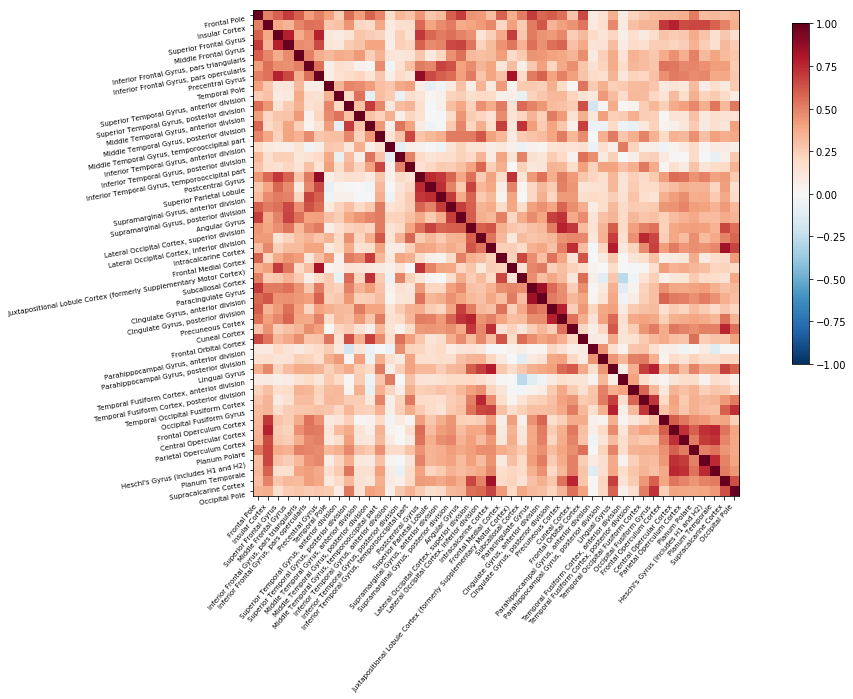

In [3]:
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels

tf.reset_default_graph()

imported_graph = tf.train.import_meta_graph('./model/model.meta')

'''for tensor in tf.get_default_graph().get_operations():
    print (tensor.name)'''

test_x = np.zeros((1, 2304))

#choose test case from validation set
i = 42

test_x[0, :] = val_x[i]
y_pred = 0
with tf.Session() as sess:
    imported_graph.restore(sess, './model/model')
    yhat = sess.run(['Sigmoid:0'], feed_dict={'input_x:0':test_x, 'dropout_value:0':0.0})
    y_pred = np.reshape(yhat, (-1))

print('prediction is', np.argmax(y_pred), '(', y_pred, ')')
print('label is', np.argmax(val_y[i]), '(', val_y[i], ')')
print('Note: 1 means diseased and 0 means healthy')

display = plotting.plot_matrix(val_x[i].reshape(48, 48), vmin=-1.0, vmax=1.0, colorbar=True, labels=labels[1:], figure = (10, 10))
plotting.show()